<a href="https://colab.research.google.com/github/FoseFx/HousePrices/blob/main/Data_exploration_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and load Data

In [1]:
from google.colab import files
!kaggle
files.upload()
!mv kaggle.json ~/.kaggle/

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d ngee379k/house-prices-advanced-regression-techniques
!mkdir data
!unzip house-prices-advanced-regression-techniques.zip -d data

  0% 0.00/94.0k [00:00<?, ?B/s]
100% 94.0k/94.0k [00:00<00:00, 29.0MB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data/housetrain.csv     


In [3]:
import pandas as pd
df_train = pd.read_csv("./data/housetrain.csv")

# Basics

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
len(df_train.columns)

82

In [4]:
df_train.shape

(1460, 81)

In [7]:
import seaborn as sns

## MSZoning

In [ ]:
df_train["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

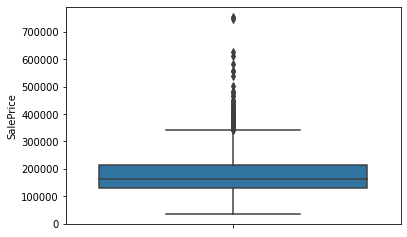

In [ ]:
sns.boxplot(y="SalePrice", data=df_train)

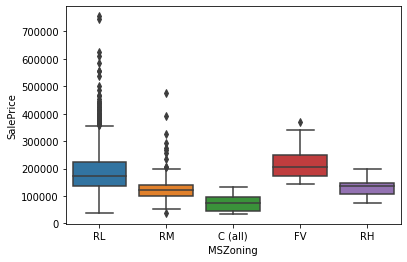

In [ ]:
sns.boxplot(x="MSZoning", y="SalePrice", data=df_train)

## MSSubClass

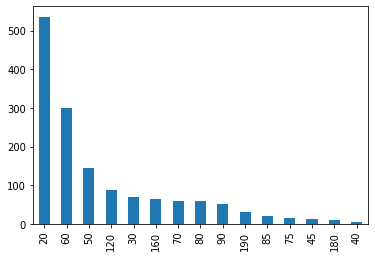

In [ ]:
df_train["MSSubClass"].value_counts().plot.bar()

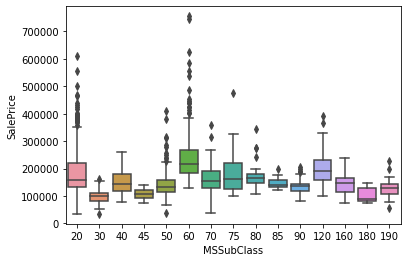

In [ ]:
sns.boxplot(data=df_train, x="MSSubClass", y="SalePrice")

## LotFrontage

In [ ]:
df_train["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [ ]:
# Convert feet to meters
df_train["LotFrontageM"] = df_train["LotFrontage"].apply(lambda x : x * 0.3048)

In [ ]:
df_train["LotFrontageM"].describe()

count    1201.000000
mean       21.351227
std         7.401992
min         6.400800
25%        17.983200
50%        21.031200
75%        24.384000
max        95.402400
Name: LotFrontageM, dtype: float64

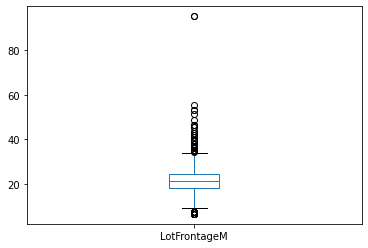

In [ ]:
df_train["LotFrontageM"].plot.box()

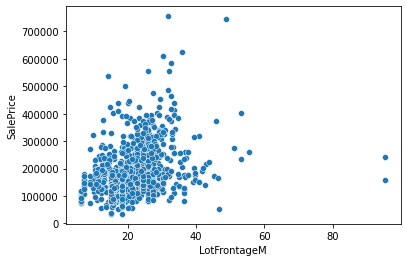

In [ ]:
sns.scatterplot(data=df_train, x="LotFrontageM", y="SalePrice")

## LotArea

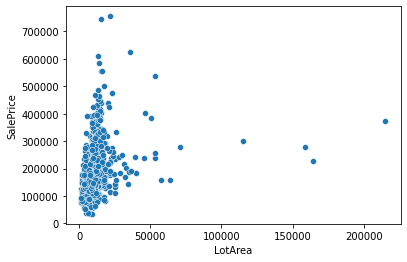

In [ ]:
sns.scatterplot(data=df_train, x="LotArea", y="SalePrice")

In [ ]:
df_train["LotArea"].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

## SaleCondition

In [ ]:
df_train["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

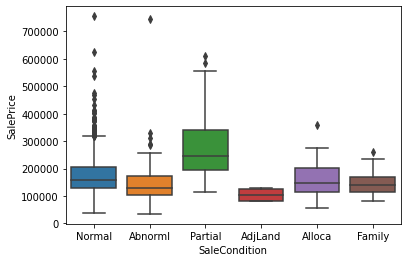

In [ ]:
sns.boxplot(data=df_train, x="SaleCondition", y="SalePrice")

## SaleType

In [ ]:
df_train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

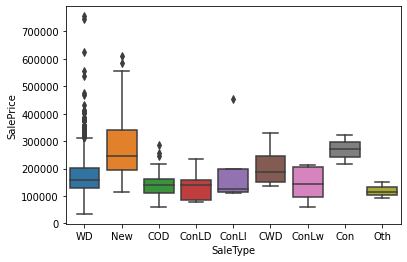

In [ ]:
sns.boxplot(data=df_train, x="SaleType", y="SalePrice")

## Street

In [ ]:
df_train["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

## Alley


In [ ]:
df_train["Alley"].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

## LotShape

In [ ]:
df_train["LotShape"].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

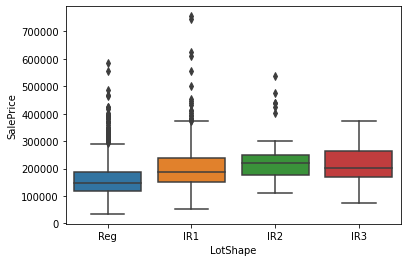

In [ ]:
sns.boxplot(data=df_train, x="LotShape", y="SalePrice")

## LandContour

In [ ]:
df_train["LandContour"].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

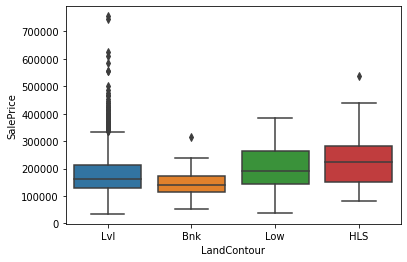

In [ ]:
sns.boxplot(data=df_train, x="LandContour", y="SalePrice")

## Utilities

In [ ]:
df_train["Utilities"].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

## LotConfig

In [ ]:
df_train["LotConfig"].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

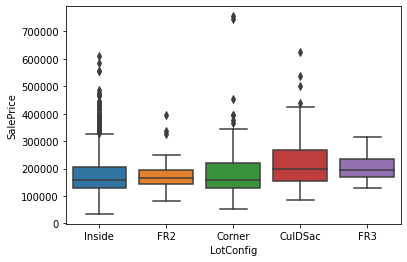

In [ ]:
sns.boxplot(data=df_train, x="LotConfig", y="SalePrice")

## LandSlope

In [ ]:
df_train["LandSlope"].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

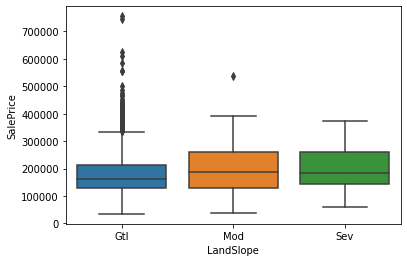

In [ ]:
sns.boxplot(data=df_train, x="LandSlope", y="SalePrice")

## Neighborhood

In [ ]:
df_train["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

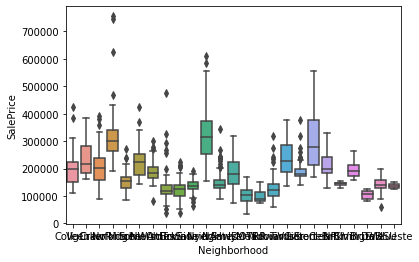

In [ ]:
sns.boxplot(data=df_train, x="Neighborhood", y="SalePrice")

## Condition1

In [ ]:
df_train["Condition1"].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

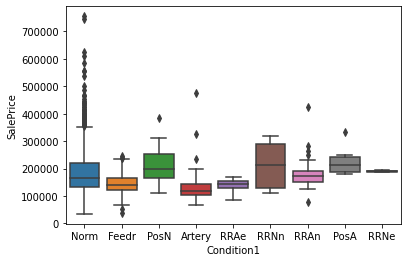

In [ ]:
sns.boxplot(data=df_train, x="Condition1", y="SalePrice")

## Condition2


In [ ]:
df_train["Condition2"].value_counts()

Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

## BldgType

In [ ]:
df_train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

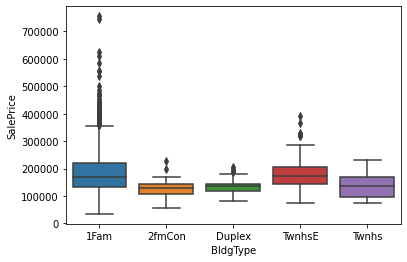

In [ ]:
sns.boxplot(data=df_train, x="BldgType", y="SalePrice")

## HouseStyle

In [ ]:
df_train["HouseStyle"].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

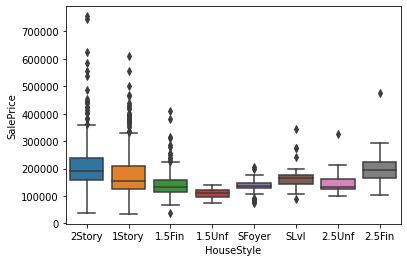

In [ ]:
sns.boxplot(data=df_train, x="HouseStyle", y="SalePrice")

## OverallQual

In [ ]:
df_train["OverallQual"].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [ ]:
df_train["OverallQual"].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

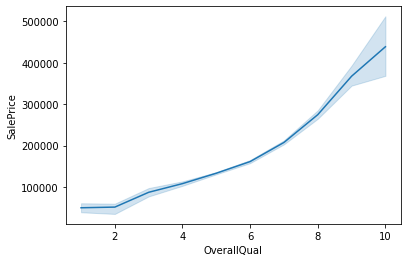

In [ ]:
sns.lineplot(data=df_train, x="OverallQual", y="SalePrice")

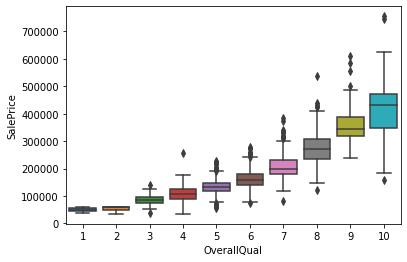

In [ ]:
sns.boxplot(data=df_train, x="OverallQual", y="SalePrice")

## OverallCond

In [ ]:
df_train["OverallCond"].describe()

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64

In [ ]:
df_train["OverallCond"].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

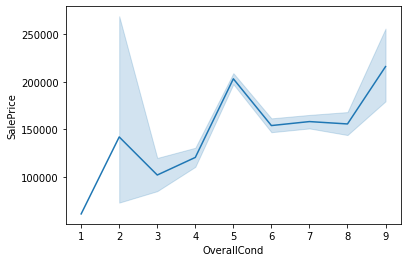

In [ ]:
sns.lineplot(data=df_train, x="OverallCond", y="SalePrice")

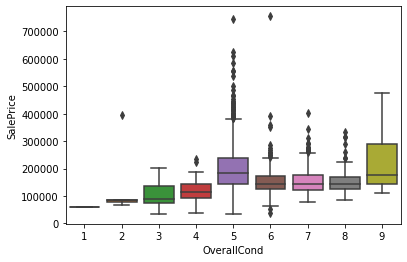

In [ ]:
sns.boxplot(data=df_train, x="OverallCond", y="SalePrice")

## YearBuilt

In [ ]:
df_train["YearBuilt"].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

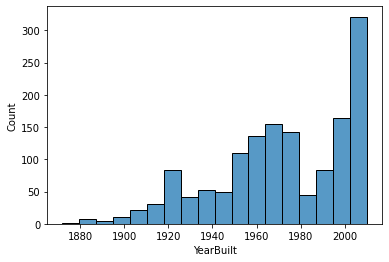

In [ ]:
sns.histplot(df_train["YearBuilt"])

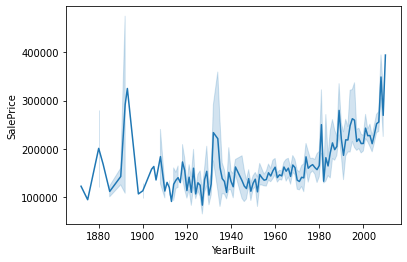

In [ ]:
sns.lineplot(data=df_train, x="YearBuilt", y="SalePrice")

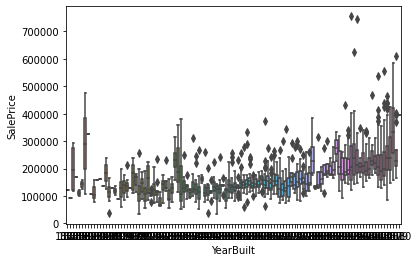

In [ ]:
sns.boxplot(data=df_train, x="YearBuilt", y="SalePrice")

## YearRemodAdd

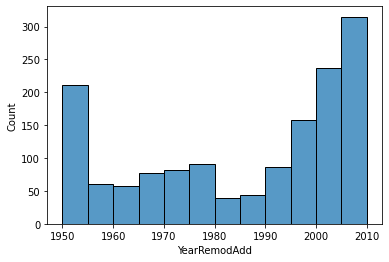

In [ ]:
sns.histplot(df_train["YearRemodAdd"])

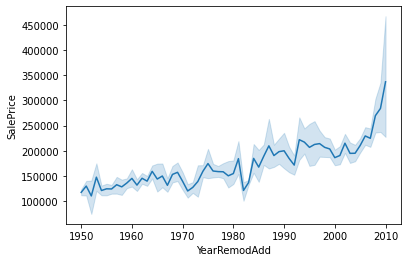

In [ ]:
sns.lineplot(data=df_train, x="YearRemodAdd", y="SalePrice")

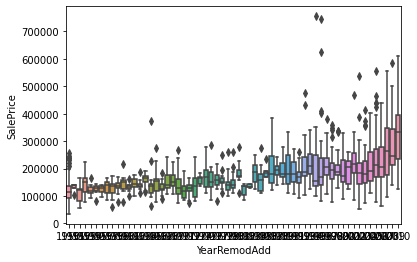

In [ ]:
sns.boxplot(data=df_train, x="YearRemodAdd", y="SalePrice")

## RoofStyle

In [ ]:
df_train["RoofStyle"].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

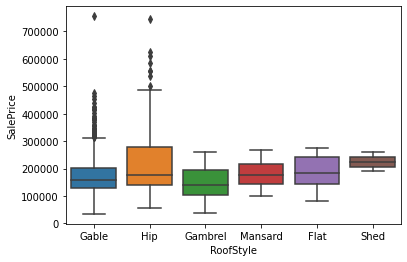

In [ ]:
sns.boxplot(data=df_train, x="RoofStyle", y="SalePrice")

## RoofMatl

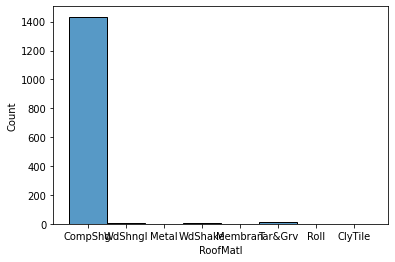

In [ ]:
sns.histplot(df_train["RoofMatl"])

## Exterior1st

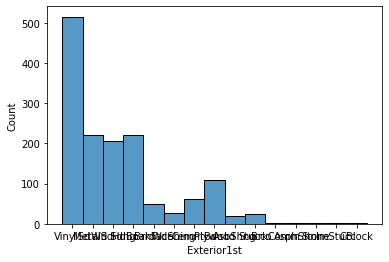

In [ ]:
sns.histplot(df_train["Exterior1st"])

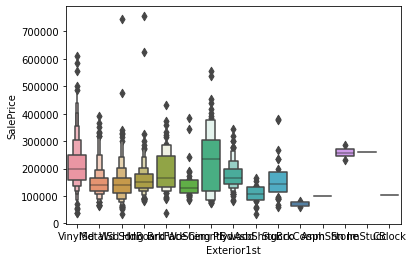

In [ ]:
sns.boxenplot(data=df_train, x="Exterior1st", y="SalePrice")

## Exterior2nd

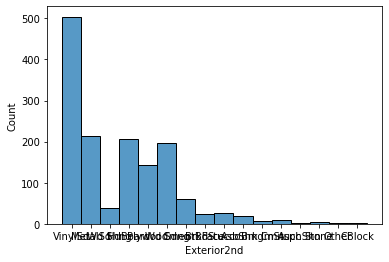

In [ ]:
sns.histplot(df_train["Exterior2nd"])

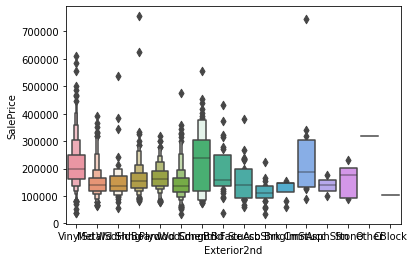

In [ ]:
sns.boxenplot(data=df_train, x="Exterior2nd", y="SalePrice")

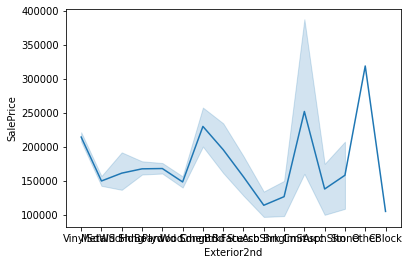

In [ ]:
sns.lineplot(data=df_train, x="Exterior2nd", y="SalePrice")

## MasVnrType

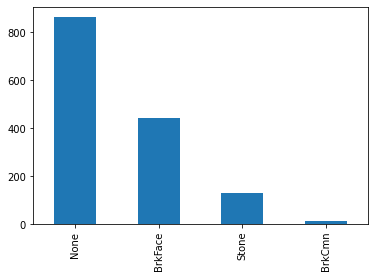

In [ ]:
df_train["MasVnrType"].value_counts().plot.bar()

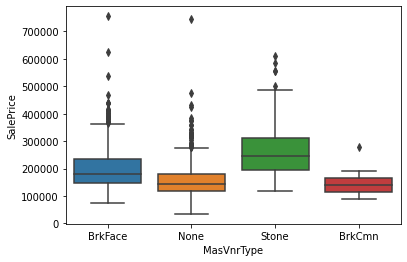

In [ ]:
sns.boxplot(data=df_train, x="MasVnrType", y="SalePrice")

## MasVnrArea

In [ ]:
df_train["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

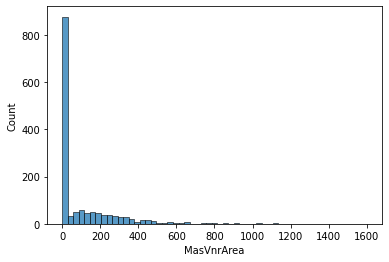

In [ ]:
sns.histplot(df_train["MasVnrArea"])

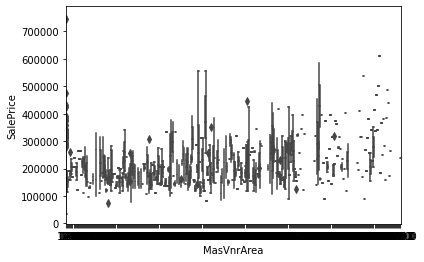

In [ ]:
sns.boxplot(data=df_train, y="SalePrice", x="MasVnrArea")

## ExterQual

In [ ]:
df_train["ExterQual"].describe()

count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object

In [ ]:
df_train["ExterQual"].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

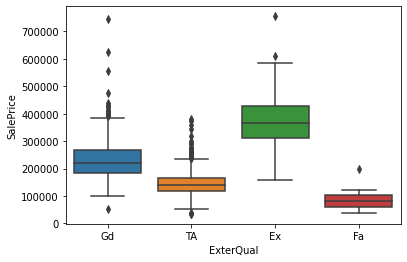

In [ ]:
sns.boxplot(data=df_train, y="SalePrice", x="ExterQual")

## MoSold

In [ ]:
df_train["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

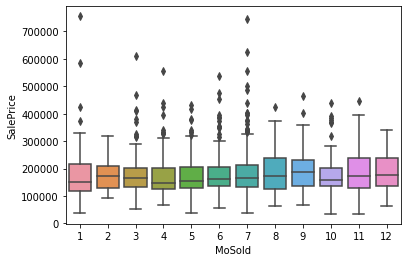

In [ ]:
sns.boxplot(data=df_train, y="SalePrice", x="MoSold")

## Fence

In [ ]:
df_train["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

## PoolQC

In [ ]:
df_train["PoolQC"].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

## ExterCond

In [6]:
df_train["ExterCond"].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

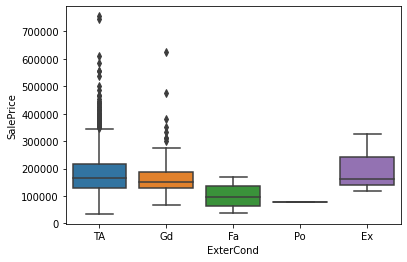

In [8]:
sns.boxplot(data=df_train, y="SalePrice", x="ExterCond")

## Foundation

In [9]:
df_train["Foundation"].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

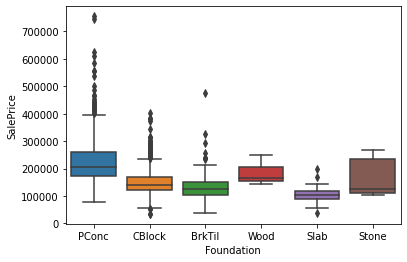

In [10]:
sns.boxplot(data=df_train, y="SalePrice", x="Foundation")

## BsmtQual

In [13]:
df_train["BsmtQual"].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

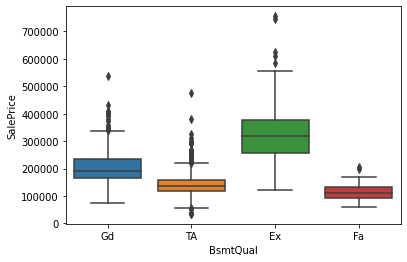

In [14]:
sns.boxplot(data=df_train, y="SalePrice", x="BsmtQual")

## BsmtCond

In [17]:
df_train["BsmtCond"].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

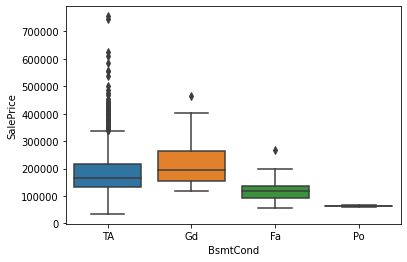

In [18]:
sns.boxplot(data=df_train, y="SalePrice", x="BsmtCond")

## BsmtExposure

In [19]:
df_train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

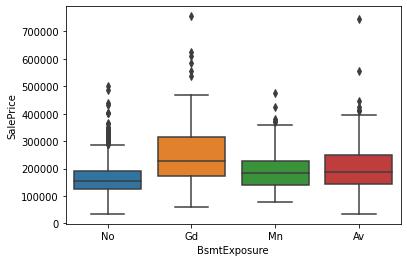

In [20]:
sns.boxplot(data=df_train, y="SalePrice", x="BsmtExposure")

## BsmtFinType1

In [21]:
df_train["BsmtFinType1"].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

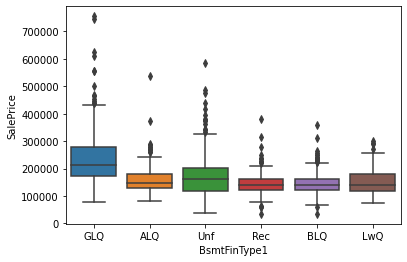

In [22]:
sns.boxplot(data=df_train, y="SalePrice", x="BsmtFinType1")

## BsmtFinSF1

In [24]:
df_train["BsmtFinSF1"].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

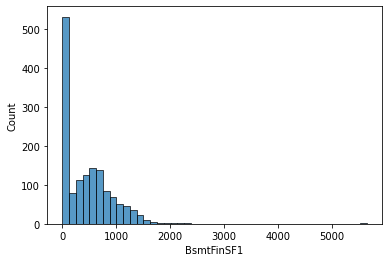

In [25]:
sns.histplot(df_train["BsmtFinSF1"])

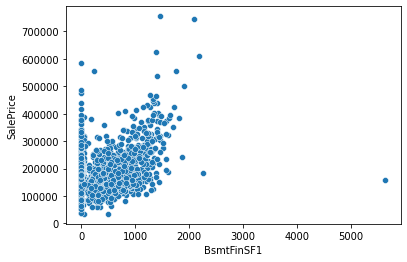

In [27]:
sns.scatterplot(data=df_train, y="SalePrice", x="BsmtFinSF1")

## BsmtFinType2

In [30]:
df_train["BsmtFinType2"].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

## Summary


|      NAME       |  TYPE  |  EXP  |    COMMENTS     |
|-----------------|--------|-------|-----------------|
| 'Id'            | Int(C) |  NO   |  DROP! |
| 'MSSubClass'    | Int(D) |  M-H  |  The building class (20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190) |
| 'MSZoning'      | Str(D) |  L-M  |  Zoning classification (By far most are RL) "RL", "RM", "C (all)", "FV", "RH" |
| 'LotFrontage'   | Int(C) |  M-H  |  Linear feet of street connected to property |
| 'LotArea'       | Int(C) |  M-H  |  Replace N/A with 0 |
| 'Street'        | Str(D) |  no   |  DROP! |
| 'Alley'         | Str(D) |  no   |  DROP! |
| 'LotShape'      | Str(D) |  N-L  |  Drop? |
| 'LandContour'   | Str(D) |  L-M  |        | 
| 'Utilities'     | Str(D) |  no   |  DROP! |
| 'LotConfig'     | Str(D) |  L-M  |        |
| 'LandSlope'     | Str(D) |  L    |  DROP! |
| 'Neighborhood'  | Str(D) |  H    |        |
| 'Condition1'    | Str(D) |  M-H  |        |
| 'Condition2'    | Str(D) |  no   |  DROP! |
| 'BldgType'      | Str(D) |  M-H  |        |
| 'HouseStyle'    | Str(D) |  M-H  |        |
| 'OverallQual'   | Int(D) |  H    | Convert to percentage: x/10 |
| 'OverallCond'   | Int(D) |  H    | Convert to percentage: x/10 |
| 'YearBuilt'     | Int(D) |  M-H  | Convert to "Age" = YrSold-YearBuilt |
| 'YearRemodAdd'  | Int(D) |  M-H  | Convert to "RemodAge" = YrSold-YearRemodAdd |
| 'RoofStyle'     | Str(D) |  N-L  |         |
| 'RoofMatl'      | Str(D) |  no   |  DROP!  |
| 'Exterior1st'   | Str(D) |  N-L  |         |
| 'Exterior2nd'   | Str(D) |  N-L  |         |
| 'MasVnrType'    | Str(D) |  N-L  |         |
| 'MasVnrArea'    | Str(D) |  N-L  |         |
| 'ExterQual'     | Str(D) |  M    |         |
| 'ExterCond'     | Str(D) |  N-L  |         |
| 'Foundation'    | Str(D) |  L-M  |         |
| 'BsmtQual'      | Str(D) |  M-H  |         |
| 'BsmtCond'      | Str(D) |  L-M  |         |
| 'BsmtExposure'  | Str(D) |  L-M  |         |
| 'BsmtFinType1'  | Str(D) |  L-M  |         |
| 'BsmtFinSF1'    | Int(C) |  M    |         |
| 'BsmtFinType2'  | Str(D) |  N-L  |  Drop   |
| 'BsmtFinSF2'    |  idc   |  idc  |  Drop   |
| 'BsmtUnfSF'     |        |       |         |
| 'TotalBsmtSF'   |        |       |         |
| 'Heating'       |        |       |         |
| 'HeatingQC'     |        |       |         |
| 'CentralAir'    |        |       |         |
| 'Electrical'    |        |       |         |
| '1stFlrSF'      |        |       |         |
| '2ndFlrSF'      |        |       |         |
| 'LowQualFinSF'  |        |       |         |
| 'GrLivArea'     |        |       |         |
| 'BsmtFullBath'  |        |       |         |
| 'BsmtHalfBath'  |        |       |         |
| 'FullBath'      |        |       |         |
| 'HalfBath'      |        |       |         |
| 'BedroomAbvGr'  |        |       |         |
| 'KitchenAbvGr'  |        |       |         |
| 'KitchenQual'   |        |       |         |
| 'TotRmsAbvGrd'  |        |       |         |
| 'Functional'    |        |       |         |
| 'Fireplaces'    |        |       |         |
| 'FireplaceQu'   |        |       |         |
| 'GarageType'    |        |       |         |
| 'GarageYrBlt'   |        |       |         |
| 'GarageFinish'  |        |       |         |
| 'GarageCars'    |        |       |         |
| 'GarageArea'    |        |       |         |
| 'GarageQual     |        |       |         |
| 'GarageCond'    |        |       |         |
| 'PavedDrive'    |        |       |         |
| 'WoodDeckSF'    |        |       |         |
| 'OpenPorchSF    |        |       |         |
| 'EnclosedPorch' |        |       |         |
| '3SsnPorch'     |        |       |         |
| 'ScreenPorch'   |        |       |         |
| 'PoolArea'      |
| 'PoolQC         | idc    | idc   |  DROP!  |
| 'Fence'         | idc    | idc   |  DROP!  |
| 'MiscFeature'   | idc    | idc   |  DROP!  |
| 'MiscVal'       | idc    | idc   |  DROP!  |
| 'MoSold'        | Int(D) | no    |  DROP!  |
| 'YrSold'        | Int(D) | M-H   |  Adjust for Inflation |
| 'SaleType'      | Str(D) | N-L   |  Drop?  |
| 'SaleCondition' | Str(D) | N-L   |  Drop all non-normal values |
|-----------------|--------|-------|-----------------|
| 'SalePrice'     |        |       |  Target |


*Progress: 45/80 (56.3%)*


